In [1]:
!pip install heatmapz
!pip install plotly

In [2]:
#Loading prerequisite libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from datetime import datetime
import scipy.stats as stats

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import poisson
import scipy.stats  as stats
import seaborn as sns
from IPython.display import Image

In [3]:
#Reading the merged dataset and dropping the rows where countyFIPS = 0
state_covid_data = pd.read_csv("../../../data/stage_1/long_large_covid.csv")
case_ind = state_covid_data[state_covid_data['countyFIPS'] == 0].index
state_covid_data.drop(case_ind, inplace=True)
state_covid_data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
573,1001,Autauga County,AL,1,2020-01-22,0,0,55869
574,1001,Autauga County,AL,1,2020-01-23,0,0,55869
575,1001,Autauga County,AL,1,2020-01-24,0,0,55869
576,1001,Autauga County,AL,1,2020-01-25,0,0,55869
577,1001,Autauga County,AL,1,2020-01-26,0,0,55869
...,...,...,...,...,...,...,...,...
1829584,56045,Weston County,WY,56,2021-08-12,700,6,6927
1829585,56045,Weston County,WY,56,2021-08-13,700,6,6927
1829586,56045,Weston County,WY,56,2021-08-14,705,6,6927
1829587,56045,Weston County,WY,56,2021-08-15,705,6,6927


In [4]:
#Changing the format of the date in the data frame
state_covid_data['Date'] = state_covid_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [5]:
#Reading the data which belongs to the state California
CA_state_data = state_covid_data[state_covid_data['State'] == 'CA']
CA_state_data 

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
109443,6001,Alameda County,CA,6,2020-01-22,0,0,1671329
109444,6001,Alameda County,CA,6,2020-01-23,0,0,1671329
109445,6001,Alameda County,CA,6,2020-01-24,0,0,1671329
109446,6001,Alameda County,CA,6,2020-01-25,0,0,1671329
109447,6001,Alameda County,CA,6,2020-01-26,0,0,1671329
...,...,...,...,...,...,...,...,...
142672,6115,Yuba County,CA,6,2021-08-12,7061,49,78668
142673,6115,Yuba County,CA,6,2021-08-13,7126,49,78668
142674,6115,Yuba County,CA,6,2021-08-14,7126,49,78668
142675,6115,Yuba County,CA,6,2021-08-15,7126,49,78668


In [6]:
#calculating the difference of a Cases element and creating a new column 'Cases/Day'
CA_state_data['Cases/Day'] = CA_state_data['Cases'].diff()
#calculating the difference of a Cases element and creating a new column 'Deaths/Day'
CA_state_data['Deaths/Day'] = CA_state_data['Death'].diff()
CA_state_data

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population,Cases/Day,Deaths/Day
109443,6001,Alameda County,CA,6,2020-01-22,0,0,1671329,NaN,NaN
109444,6001,Alameda County,CA,6,2020-01-23,0,0,1671329,0.0,0.0
109445,6001,Alameda County,CA,6,2020-01-24,0,0,1671329,0.0,0.0
109446,6001,Alameda County,CA,6,2020-01-25,0,0,1671329,0.0,0.0
109447,6001,Alameda County,CA,6,2020-01-26,0,0,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
142672,6115,Yuba County,CA,6,2021-08-12,7061,49,78668,35.0,0.0
142673,6115,Yuba County,CA,6,2021-08-13,7126,49,78668,65.0,0.0
142674,6115,Yuba County,CA,6,2021-08-14,7126,49,78668,0.0,0.0
142675,6115,Yuba County,CA,6,2021-08-15,7126,49,78668,0.0,0.0


In [7]:
#Deleting the first row as it gives NaN value
CA_state_data = CA_state_data[CA_state_data['Date'] != '2020-01-22']

#Removing the number of cases and deaths columns as we have new cases and deaths
CA_state_data.drop(['Cases','Death'], axis=1, inplace=True)
CA_counties = CA_state_data 
CA_counties

,countyFIPS,County Name,State,StateFIPS,Date,Population,Cases/Day,Deaths/Day
109444,6001,Alameda County,CA,6,2020-01-23,1671329,0.0,0.0
109445,6001,Alameda County,CA,6,2020-01-24,1671329,0.0,0.0
109446,6001,Alameda County,CA,6,2020-01-25,1671329,0.0,0.0
109447,6001,Alameda County,CA,6,2020-01-26,1671329,0.0,0.0
109448,6001,Alameda County,CA,6,2020-01-27,1671329,0.0,0.0
...,...,...,...,...,...,...,...,...
142672,6115,Yuba County,CA,6,2021-08-12,78668,35.0,0.0
142673,6115,Yuba County,CA,6,2021-08-13,78668,65.0,0.0
142674,6115,Yuba County,CA,6,2021-08-14,78668,0.0,0.0
142675,6115,Yuba County,CA,6,2021-08-15,78668,0.0,0.0


In [8]:
ca_ind = {'Cases/Day':'sum','Deaths/Day':'sum','Population':'sum','State':'first'}
CA_state_data = CA_state_data.groupby("Date").agg(ca_ind).reset_index()
CA_state_data

,Date,Cases/Day,Deaths/Day,Population,State
0,2020-01-23,0.0,0.0,39512223,CA
1,2020-01-24,0.0,0.0,39512223,CA
2,2020-01-25,0.0,0.0,39512223,CA
3,2020-01-26,2.0,0.0,39512223,CA
4,2020-01-27,1.0,0.0,39512223,CA
...,...,...,...,...,...
567,2021-08-12,10448.0,57.0,39512223,CA
568,2021-08-13,14007.0,61.0,39512223,CA
569,2021-08-14,0.0,0.0,39512223,CA
570,2021-08-15,0.0,0.0,39512223,CA


In [9]:
#Normalizing the cases and deaths by population
CA_data_normalized = CA_state_data
CA_data_normalized['Normalized Cases']= (CA_data_normalized['Cases/Day']/CA_data_normalized['Population'])*100000
CA_data_normalized['Normalized Deaths']= (CA_data_normalized['Deaths/Day']/CA_data_normalized['Population'])*100000
CA_data_normalized

,Date,Cases/Day,Deaths/Day,Population,State,Normalized Cases,Normalized Deaths
0,2020-01-23,0.0,0.0,39512223,CA,0.000000,0.000000
1,2020-01-24,0.0,0.0,39512223,CA,0.000000,0.000000
2,2020-01-25,0.0,0.0,39512223,CA,0.000000,0.000000
3,2020-01-26,2.0,0.0,39512223,CA,0.005062,0.000000
4,2020-01-27,1.0,0.0,39512223,CA,0.002531,0.000000
...,...,...,...,...,...,...,...
567,2021-08-12,10448.0,57.0,39512223,CA,26.442450,0.144259
568,2021-08-13,14007.0,61.0,39512223,CA,35.449790,0.154383
569,2021-08-14,0.0,0.0,39512223,CA,0.000000,0.000000
570,2021-08-15,0.0,0.0,39512223,CA,0.000000,0.000000


In [10]:
#Finding the weekly normalized number of cases and deaths
CA_state_data = CA_data_normalized.groupby([pd.Grouper(key='Date', freq='w')])['Normalized Cases','Normalized Deaths'].agg({'Normalized Cases':'mean',
                                                                                                'Normalized Deaths' :'mean'}).round().reset_index()
CA_state_data

,Date,Normalized Cases,Normalized Deaths
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
...,...,...,...
78,2021-07-25,14.0,0.0
79,2021-08-01,20.0,0.0
80,2021-08-08,26.0,0.0
81,2021-08-15,29.0,-0.0


In [11]:
#Finding the mean of the column "Normalized Cases" in the dataframe
CA_mean_value = CA_state_data['Normalized Cases'].mean()
CA_mean_value

18.59036144578313

In [12]:
#calculating the Probability Mass Function for the individual values of the column "Normalized Cases"
CA_state_data['CA PMF'] = stats.poisson.pmf(k=CA_state_data['Normalized Cases'].round(decimals=0), mu=CA_mean_value)
CA_state_data

,Date,Normalized Cases,Normalized Deaths,CA PMF
0,2020-01-26,0.0,0.0,8.439342e-09
1,2020-02-02,0.0,0.0,8.439342e-09
2,2020-02-09,0.0,0.0,8.439342e-09
3,2020-02-16,0.0,0.0,8.439342e-09
4,2020-02-23,0.0,0.0,8.439342e-09
...,...,...,...,...
78,2021-07-25,14.0,0.0,5.700723e-02
79,2021-08-01,20.0,0.0,8.432195e-02
80,2021-08-08,26.0,0.0,2.099777e-02
81,2021-08-15,29.0,-0.0,6.153426e-03


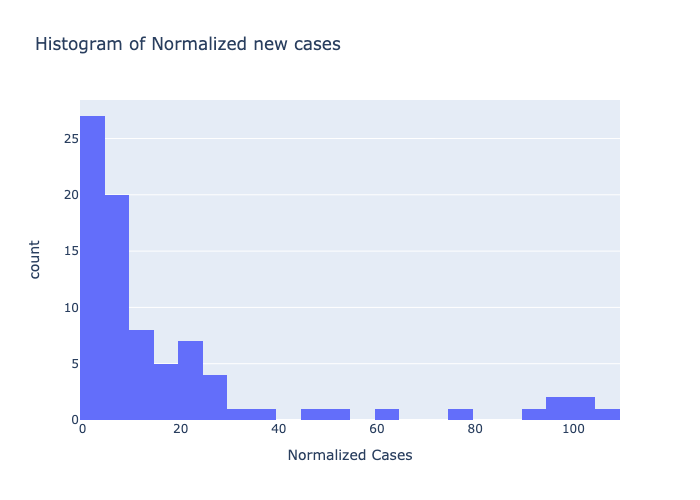

In [13]:
#Plotting the histogram of normalized new cases
fig1 = px.histogram(CA_state_data,
                   x='Normalized Cases',
                   nbins=50,
                   title='Histogram of Normalized new cases ')
fig1.write_image("../../../Images/member/Lahari/stage_3/fig1.png")
img_bytes = fig1.to_image(format="png")
Image(img_bytes)

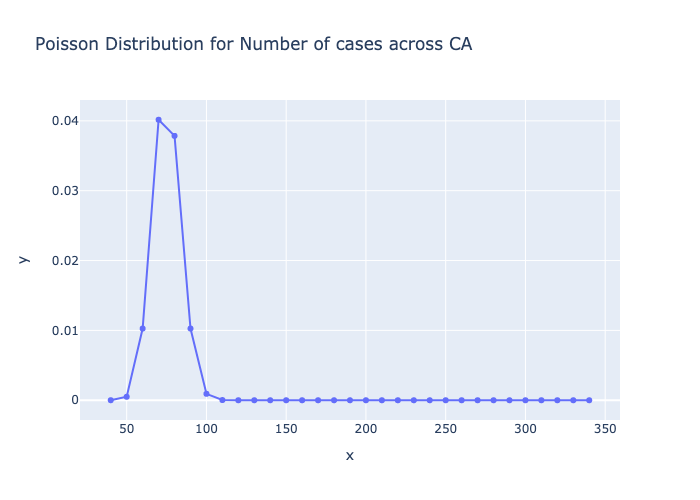

In [14]:
fig1_f2 = px.scatter(CA_state_data,
                 x=range(40,350,10), 
                 y=stats.poisson.pmf(k=range(40,350,10),mu=75),
                 title='Poisson Distribution for Number of cases across CA')
fig1_f2 = fig1_f2.update_traces(mode='lines+markers')
fig1_f2.write_image("../../../Images/member/Lahari/stage_3/fig1_f2.png")
img_bytes = fig1_f2.to_image(format="png")
Image(img_bytes)

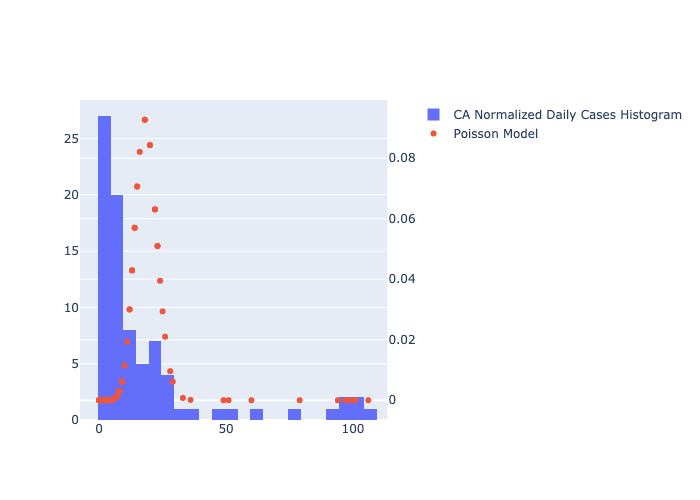

In [15]:
# Calculate the pmf values using the poission distribution and plot
fig1_f3 = go.Figure()
# Create figure with secondary y-axis
fig1_f3 = make_subplots(specs=[[{"secondary_y": True}]])
fig1_f3.add_trace(go.Histogram(x=CA_state_data['Normalized Cases'],nbinsx=40,name="CA Normalized Daily Cases Histogram"))
fig1_f3 = fig1_f3.add_trace(go.Scatter(x=CA_state_data['Normalized Cases'], y=CA_state_data["CA PMF"],mode='markers', name="Poisson Model"), secondary_y=True)
fig1_f3.write_image("../../../Images/member/Lahari/stage_3/fig1_f3.png")
img_bytes = fig1_f3.to_image(format="png")
Image(img_bytes)

# Distribution Statistics

In [16]:
#1.Measure of center
print("Measure of center: " , CA_state_data['Normalized Cases'].mean())

#2. Measure of spread
print("Measure of spread: ", CA_state_data['Normalized Cases'].var())

#3. Skewness
print("Skewness: ", CA_state_data['Normalized Cases'].skew())

#4. Kurtosis
print("Kurtosis: ", CA_state_data['Normalized Cases'].kurt())

Measure of center:  18.59036144578313
Measure of spread:  706.7081986482515
Skewness:  2.250870942147231
Kurtosis:  4.222739586165505


In [17]:
CA_state_data

,Date,Normalized Cases,Normalized Deaths,CA PMF
0,2020-01-26,0.0,0.0,8.439342e-09
1,2020-02-02,0.0,0.0,8.439342e-09
2,2020-02-09,0.0,0.0,8.439342e-09
3,2020-02-16,0.0,0.0,8.439342e-09
4,2020-02-23,0.0,0.0,8.439342e-09
...,...,...,...,...
78,2021-07-25,14.0,0.0,5.700723e-02
79,2021-08-01,20.0,0.0,8.432195e-02
80,2021-08-08,26.0,0.0,2.099777e-02
81,2021-08-15,29.0,-0.0,6.153426e-03


In [18]:
#Rounding the mean values of normalized cases and deaths columns
CA_state_data.mean().round(decimals=0)

Normalized Cases     19.0
Normalized Deaths     0.0
CA PMF                0.0
dtype: float64

In [19]:
#Writing function to get PMF of cases
def getPMF(newCases, average):
  return stats.poisson.pmf(k=newCases,mu=average)

In [20]:
#calculating probability mass function to observe the probability at different points.
print(getPMF(40, 19))
print(getPMF(50, 19))
print(getPMF(60, 19))
print(getPMF(70, 19))
print(getPMF(80, 19))

9.70295045487487e-06
1.595915963983071e-09
3.576399715148321e-14
1.523182266560691e-19
1.5630223839352936e-25


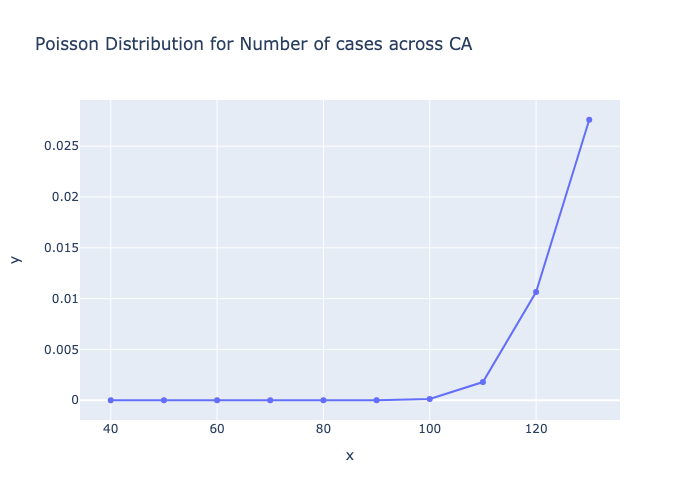

In [21]:
fig1_f4 = px.scatter(CA_state_data,
                 x=range(40,140,10), 
                 y=stats.poisson.pmf(k=range(40,140,10),
                                     mu=138),
                 title='Poisson Distribution for Number of cases across CA')
fig1_f4.update_traces(mode='lines+markers')
fig1_f4.write_image("../../../Images/member/Lahari/stage_3/fig1_f4.png")
img_bytes = fig1_f4.to_image(format="png")
Image(img_bytes)

In [22]:
#Choosing other 5 states along with California
states_data = state_covid_data[state_covid_data["State"].isin(["CA","NC","SC","NY","FL", "AL"])]

#Getting New cases and new deaths per day columns
states_data['Cases/Day'] = states_data['Cases'].diff()
states_data['Deaths/Day'] = states_data['Death'].diff()
states_data = states_data[states_data['Date'] != '2020-01-22']

states_data.drop(['Cases','Death'], axis=1, inplace=True)

ind ={'Cases/Day':'sum','Deaths/Day':'sum','Population':'sum'}
states_data = states_data.groupby(["State","Date"]).agg(ind).reset_index()

#Normalizing cases and deaths
states_data['Normalized Cases']= (states_data['Cases/Day']/states_data['Population'])*1000000
states_data['Normalized Deaths']= (states_data['Deaths/Day']/states_data['Population'])*1000000
states_data

,State,Date,Cases/Day,Deaths/Day,Population,Normalized Cases,Normalized Deaths
0,AL,2020-01-23,0.0,0.0,4903185,0.000000,0.000000
1,AL,2020-01-24,0.0,0.0,4903185,0.000000,0.000000
2,AL,2020-01-25,0.0,0.0,4903185,0.000000,0.000000
3,AL,2020-01-26,0.0,0.0,4903185,0.000000,0.000000
4,AL,2020-01-27,0.0,0.0,4903185,0.000000,0.000000
...,...,...,...,...,...,...,...
3427,SC,2021-08-12,3279.0,12.0,5148714,636.858058,2.330679
3428,SC,2021-08-13,4526.0,20.0,5148714,879.054459,3.884465
3429,SC,2021-08-14,0.0,0.0,5148714,0.000000,0.000000
3430,SC,2021-08-15,0.0,0.0,5148714,0.000000,0.000000


In [23]:
#Grouping by week and finding the mean
Mean_states = states_data.groupby(["State", pd.Grouper(key='Date', freq='w')])['Normalized Cases','Normalized Deaths'].agg({'Normalized Cases':'mean',
                                                                                                'Normalized Deaths' :'mean',}).round().reset_index()
Mean_states

,State,Date,Normalized Cases,Normalized Deaths
0,AL,2020-01-26,0.0,0.0
1,AL,2020-02-02,0.0,0.0
2,AL,2020-02-09,0.0,0.0
3,AL,2020-02-16,0.0,0.0
4,AL,2020-02-23,0.0,0.0
...,...,...,...,...
493,SC,2021-07-25,140.0,0.0
494,SC,2021-08-01,286.0,1.0
495,SC,2021-08-08,476.0,1.0
496,SC,2021-08-15,610.0,2.0


In [24]:
#Calculate the mean and median of the Number of cases per day normalized
states_weekly_stats_cases = Mean_states.groupby('State')['Normalized Cases'].agg(['mean','median']).round().reset_index()
states_weekly_stats_cases

,State,mean,median
0,AL,244.0,180.0
1,CA,186.0,82.0
2,FL,231.0,165.0
3,NC,199.0,145.0
4,NY,196.0,94.0
5,SC,245.0,168.0


In [25]:
#Calculate the mean and median of the Number of deaths per day normalized
states_weekly_stats_deaths = Mean_states.groupby('State')['Normalized Deaths'].agg(['mean','median']).round().reset_index()
states_weekly_stats_deaths

,State,mean,median
0,AL,4.0,2.0
1,CA,3.0,2.0
2,FL,3.0,3.0
3,NC,2.0,2.0
4,NY,5.0,2.0
5,SC,4.0,2.0


In [26]:
k_values = range(40,170,10)
states = states_weekly_stats_cases['State']
means = states_weekly_stats_cases['mean']
column_names = ['state','mean','k_value','probability']

data_dict={}
for column in column_names:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_cases=pd.DataFrame.from_dict(data_dict)
poisson_data_cases

,state,mean,k_value,probability
0,AL,244.0,40,4.131373e-59
1,AL,244.0,50,8.290159e-52
2,AL,244.0,60,2.266528e-45
3,AL,244.0,70,1.177685e-39
4,AL,244.0,80,1.474364e-34
...,...,...,...,...
73,SC,245.0,120,2.967483e-19
74,SC,245.0,130,2.391937e-16
75,SC,245.0,140,8.953519e-14
76,SC,245.0,150,1.643884e-11


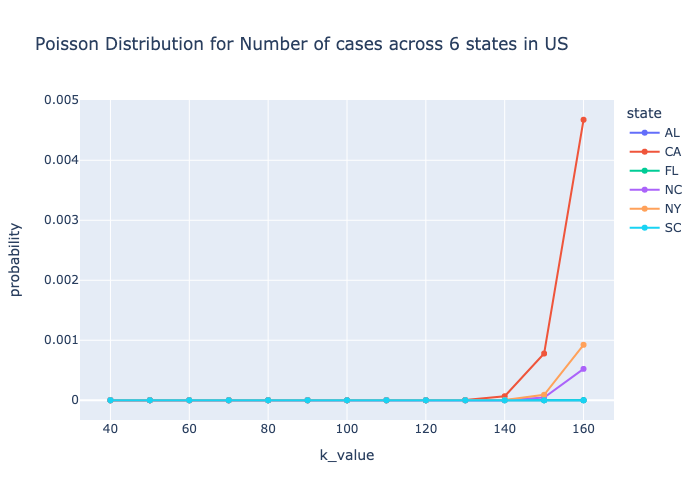

In [27]:
#plot the poisson distribution cases
fig1_f5 = px.scatter(poisson_data_cases, 
                 x="k_value", 
                 y="probability",
                 color='state',
                 title='Poisson Distribution for Number of cases across 6 states in US')
fig1_f5 = fig1_f5.update_traces(mode='lines+markers')
fig1_f5.write_image("../../../Images/member/Lahari/stage_3/fig1_f5.png")
img_bytes = fig1_f5.to_image(format="png")
Image(img_bytes)

In [28]:
k_values = range(12)
states = states_weekly_stats_deaths['State']
means = states_weekly_stats_deaths['mean']
column_names = ['state','mean','k_value','probability']

data_dict={}
for column in column_names:
    data_dict[column]=[]
        
for idx, mean in enumerate(means):
    for k_value in k_values:
        data_dict['state'].append(states[idx])
        data_dict['mean'].append(mean)
        data_dict['k_value'].append(k_value)
        data_dict['probability'].append(stats.poisson.pmf(k=k_value,mu=mean))
poisson_data_deaths=pd.DataFrame.from_dict(data_dict)
poisson_data_deaths

,state,mean,k_value,probability
0,AL,4.0,0,0.018316
1,AL,4.0,1,0.073263
2,AL,4.0,2,0.146525
3,AL,4.0,3,0.195367
4,AL,4.0,4,0.195367
...,...,...,...,...
67,SC,4.0,7,0.059540
68,SC,4.0,8,0.029770
69,SC,4.0,9,0.013231
70,SC,4.0,10,0.005292


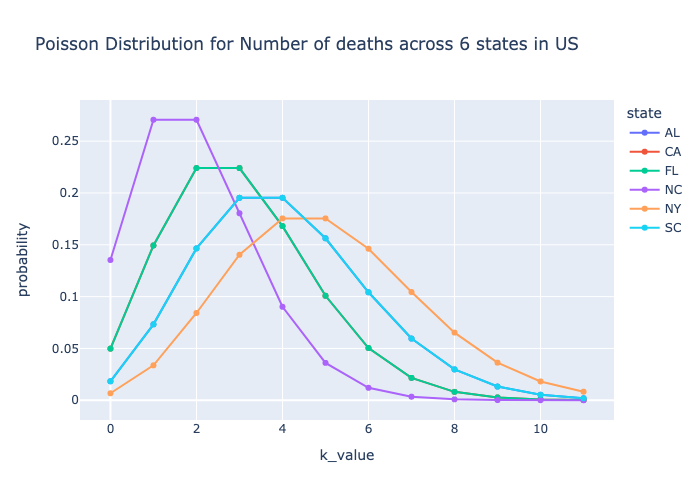

In [29]:
#plot the poisson distribution deaths
fig1_f6 = px.scatter(poisson_data_deaths, 
                 x="k_value", 
                 y="probability",
                 color='state',
                 title='Poisson Distribution for Number of deaths across 6 states in US')
fig1_f6 = fig1_f6.update_traces(mode='lines+markers')
fig1_f6.write_image("../../../Images/member/Lahari/stage_3/fig1_f6.png")
img_bytes = fig1_f6.to_image(format="png")
Image(img_bytes)

In [30]:
large_covid_data = pd.read_csv('../../../data/stage_1/long_large_covid.csv')
large_covid_data

large_covid_data_df = pd.DataFrame(large_covid_data)
large_covid_data_df

,countyFIPS,County Name,State,StateFIPS,Date,Cases,Death,Population
0,0,Statewide Unallocated,AL,1,2020-01-22,0,0,0
1,0,Statewide Unallocated,AL,1,2020-01-23,0,0,0
2,0,Statewide Unallocated,AL,1,2020-01-24,0,0,0
3,0,Statewide Unallocated,AL,1,2020-01-25,0,0,0
4,0,Statewide Unallocated,AL,1,2020-01-26,0,0,0
...,...,...,...,...,...,...,...,...
1829584,56045,Weston County,WY,56,2021-08-12,700,6,6927
1829585,56045,Weston County,WY,56,2021-08-13,700,6,6927
1829586,56045,Weston County,WY,56,2021-08-14,705,6,6927
1829587,56045,Weston County,WY,56,2021-08-15,705,6,6927


In [31]:
large_covid_data_df = large_covid_data_df.head(200000)

In [32]:
frame_display_df = pd.read_csv('../../../data/stage_1/frame_display_df.csv')

In [ ]:
#Merged covid_large_df and hospital_beds_df using inner join 
#by joining on "countyFIPS" in covid_large_df with "fips_code" in hospital_beds_df

COVID_HospitalBeds_merged_df = pd.merge(large_covid_data_df,frame_display_df,how="inner",left_on="countyFIPS",right_on="fips_code")

In [ ]:
#Reading the merged enrichment data set
COVID_HospitalBeds_merged = pd.read_csv("../../../data/stage_1/COVID_HospitalBeds_merged_df.csv")

In [ ]:
#Taking data which belongs to state Alabama
COVID_HospitalBeds_merged = COVID_HospitalBeds_merged_df[COVID_HospitalBeds_merged_df['State'] == 'AL']

In [ ]:
# Aggregating state wide
COVID_HospitalBeds_merged = COVID_HospitalBeds_merged.groupby(['State','countyFIPS','County Name','Population','Cases','Death']).sum().reset_index()
COVID_HospitalBeds_merged.head()

In [ ]:
state = COVID_HospitalBeds_merged.groupby(['County Name']).sum().reset_index()
state=state.drop(['countyFIPS'], axis=1)
state.head()

In [ ]:
corr = state.corr()
corr

In [ ]:
AL_state_data = states_data[states_data['State'] == 'AL']
AL_state_data

In [ ]:
cases_corr = state['previous_day_admission_pediatric_covid_confirmed_7_day_coverage'].corr(AL_state_data['Normalized Cases'])
cases_corr

In [ ]:
cases_corr1 = state['previous_week_personnel_covid_vaccinated_doses_administered_7_day'].corr(AL_state_data['Normalized Cases'])
cases_corr1

In [ ]:
cases_corr2 = state['previous_week_patients_covid_vaccinated_doses_one_7_day'].corr(AL_state_data['Normalized Cases'])
cases_corr2